In [48]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
def f(x,y):
    "Returns cos(x^2+y^2) as a float"
    return math.cos(x**2+y**2)

In [87]:
def norm(x):
    "Input a vector and this returns the Euclidean/L2 norm"
    return math.sqrt(np.sum(np.power(grad(x[0],x[1]),2)))

In [3]:
def grad(x,y):
    "Returns Gradient of cos(x^2+y^2) at the point (x,y) "
    xs = x**2
    ys = y**2
    return np.array([-math.sin(xs+ys)*2*x, -math.sin(xs+ys)*2*y])

In [4]:
def hess(x,y):
    "Returns Hessian of cos(x^2+y^2) at the point (x,y)"
    xs = x**2
    ys = y**2
    fxx = (-math.cos(xs + ys)*4*xs) + (2*(-math.sin(xs+ys)))
    fyy = (-math.cos(xs + ys)*4*ys) + (2*(-math.sin(xs+ys)))
    fxy = 4*x*y*-math.cos(xs+ys)
    return np.array([[fxx, fxy],[fxy, fyy]])

In [68]:
def newtons_method(x0, n):
    """ Used for finding optimal values 
    Input: x0 = first guess (x,y) (numpy array), n = number of iterations (scalar)
    Output: numpy array of optimal values
    """
    #loss: cos(x^2+y^2)
    loss = []
    #position: just the values of x and y
    position = []
    #norms: Euclidean norm of the gradient
    norms = []
    
    loss.append(f(x0[0],x0[1]))
    position.append(x0)
    norms.append(norm(x0))
    
    xprev = x0
    x,y = xprev[0], xprev[1]
    for i in range(n):
        x1  = xprev - np.dot(grad(x,y), np.linalg.inv(hess(x,y)))
        xprev = x1
        x,y = xprev[0], xprev[1]
        loss.append(f(x1[0],x1[1]))
        position.append(x1)
        norms.append(norm(x1))

    print("losses are: ", loss)
    print("positions are: ", position)
    print("grad norms are: ",norms)
    return x1, loss, norms

In [100]:
x0 = np.array([(math.pi/2)-(1e-1),(math.pi/2)-(1e-1)])

losses are:  [-0.37639802313737775, -0.868215370251345]
positions are:  [array([1.47079633, 1.47079633]), array([1.14507436, 1.14507436])]
grad norms are:  [3.8541027773400267, 1.6070320320043747]


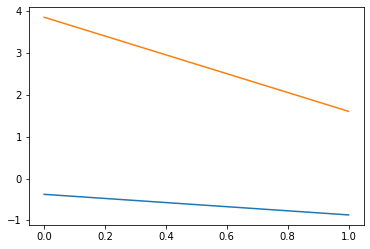

In [101]:
x, losses,norms = newtons_method(x0, 1)
f(x[0],x[1])
plt.plot(list(range(len(losses))), losses)
plt.plot(list(range(len(norms))), norms)

losses are:  [-0.37639802313737775, -0.868215370251345, -0.9870017861134855]
positions are:  [array([1.47079633, 1.47079633]), array([1.14507436, 1.14507436]), array([1.28510737, 1.28510737])]
grad norms are:  [3.8541027773400267, 1.6070320320043747, 0.5841513370013626]


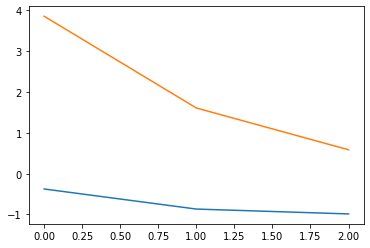

In [102]:
x, losses,norms = newtons_method(x0, 2)
f(x[0],x[1])
plt.plot(list(range(len(losses))), losses)
plt.plot(list(range(len(norms))), norms)

losses are:  [-0.37639802313737775, -0.868215370251345, -0.9870017861134855, -0.9999902688510479]
positions are:  [array([1.47079633, 1.47079633]), array([1.14507436, 1.14507436]), array([1.28510737, 1.28510737]), array([1.25419382, 1.25419382])]
grad norms are:  [3.8541027773400267, 1.6070320320043747, 0.5841513370013626, 0.01564968681261813]


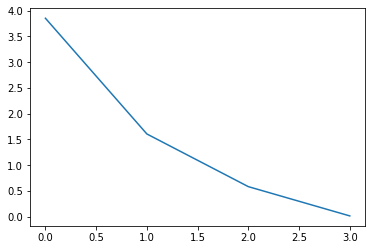

In [96]:
x, losses,norms = newtons_method(x0, 3)
f(x[0],x[1])
#plt.plot(list(range(len(losses))), losses)
plt.plot(list(range(len(norms))), norms)

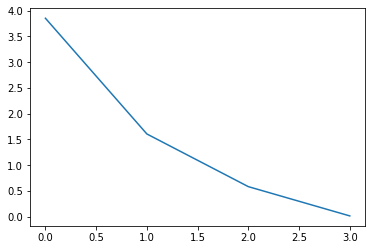

In [97]:
plt.plot(list(range(len(norms))), norms)

losses are:  [-0.37639802313737775, -0.868215370251345, -0.9870017861134855, -0.9999902688510479, -0.9999999999893884, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
positions are:  [array([1.47079633, 1.47079633]), array([1.14507436, 1.14507436]), array([1.28510737, 1.28510737]), array([1.25419382, 1.25419382]), array([1.25331506, 1.25331506]), array([1.25331414, 1.25331414]), array([1.25331414, 1.25331414]), array([1.25331414, 1.25331414]), array([1.25331414, 1.25331414]), array([1.25331414, 1.25331414]), array([1.25331414, 1.25331414])]
grad norms are:  [3.8541027773400267, 1.6070320320043747, 0.5841513370013626, 0.01564968681261813, 1.6330974673430057e-05, 1.7960244138660804e-11, 1.1401292732590946e-15, 4.34125987029568e-16, 2.7143845335477573e-15, 4.34125987029568e-16, 2.7143845335477573e-15]


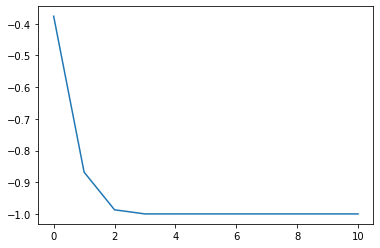

In [92]:
x, losses,norms = newtons_method(x0, 10)
f(x[0],x[1])
plt.plot(list(range(len(losses))), losses)

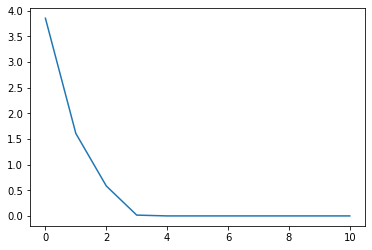

In [93]:
plt.plot(list(range(len(norms))), norms)

In [20]:
x, losses,norms = newtons_method(x0, 1000)
f(x[0],x[1])

1.0

In [ ]:
y = loss fcn x = iterations
y = grad_norm x = iteration 

In [12]:
def ftest(x,y):
    "Returns x^4+y^4"
    return x**4+y**4

In [13]:
def gradtest(x,y):
    "Returns Gradient of cos(x^2+y^2) at the point (x,y)"
    return np.array([4*(x**3), 4*(y**3)])

In [14]:
def hesstest(x,y):
    "Returns Hessian of cos(x^2+y^2) at the point (x,y)"
    fxx = 12*(x**2)
    fyy = 12*(y**2)
    fxy = 0
    return np.array([[fxx, fxy],[fxy, fyy]])

In [15]:
def test_newtons_method(x0, n):
    """ Used for finding optimal values 
    Input: x0 = first guess (x,y) (numpy array), n = number of iterations (scalar)
    Output: numpy array of optimal values
    ***Same code as the function above but with a different function, gradient, and hessian to see if im optimizing***
    """
    xprev = x0
    x,y = xprev[0], xprev[1]
    for i in range(n):
        x1  = xprev - np.dot(gradtest(x,y), np.linalg.inv(hesstest(x,y)))
        xprev = x1
        x,y = xprev[0], xprev[1]
    
    return x1

In [36]:
xtest = [10,10]

In [37]:
test_newtons_method(xtest, 1)

array([6.66666667, 6.66666667])

In [38]:
test_newtons_method(xtest, 10)

array([0.1734153, 0.1734153])

In [39]:
test_newtons_method(xtest, 100)

array([2.45965443e-17, 2.45965443e-17])

In [40]:
test_newtons_method(xtest, 1000)

array([9.55632926e-109, 9.55632926e-109])